# Lab 1: EDA, Pre-processing, and Dimensionality Reduction


**Outline:**

1. Reading the file, Summary Statistics

2. Missing Values and Imputation

3. EDA (Plotting, Outliers, Highly correlated features)

4. Standardization

5. Principal Component Analysis


In [10]:
#Import libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#download scikit-learn
#We will use scikit-learn library during this course. Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning 
#pip install scikit-learn 


# 1. Reading the file and summary statistics

### Reading the file


In this session we will use the cleveland, heart disease dataset.  
[link]( https://archive.ics.uci.edu/ml/datasets/heart+disease) to the dataset with information. 

#Note:
The header parameter specifys the Row number(s) to use as the column names, and the start of the data

In [11]:
"""
#Note:

The header attribute specifys the row number(s) to use as the column names, and the start of the data. 

"""

data = pd.read_csv("datasets/processed.cleveland.data", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### **Dataset Information as found in heart-disease.names**

This database contains 14 attributes and 303 patients that might not or might have a heart disease diagnoses. 

There are both continuous and categorical attributes. 

For example, the dataset has the age of the patients, resting blood pressure, maximum heart rate for numerical features. 
While sex, chest pain type or number of major vessels are categorical features. 

The class label is categorical, consists of labels from 0 to 4 and refers to a diagnosis of a heart disease. 
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).



### Feature explanation
- age = in years // numerical, continuous

- sex    =   (0 is female, 1 is male) // categorical


- cp     = chest pain type (1 -> typical angina,  2 -> atypical angina,  3 -> non-anginal, 4 -> asymptomatic) //categorical

- trestbps = resting blood pressure//continuous

- chol      = serum cholestral in mg/dl //continuous

- fbs       = fasting blood sugar > 120 mg/dl is 1 otherwise 0 //categorical
 
- restecg   = resting electrocardiographic result, 0 -> normal, 1 -> St-T wave abnormality, 2 -> probable or definite hypertropy//categorical

- thalach   = maximum heart rate achieved//continuous

- exang     = exercise induced angina (1 = yes, 0 = no)//categorical

- oldpeak   = ST depression induced by exercise relative to rest//continuous

- slope     = the slope of the peak exercise ST segment (1 -> upslopping, 2 -> flat, 3 -> downslopping)//categorical

- ca        = number of major vessels (0-3) covered by flourosopy//categorical

- thal      = (3 -> normal, 6 -> fixed defect, 7 -> reversible defect)//categorical

- class     = diagnosis of heart disease//categorical

### Change the column/feture names

The name of the columns and generally information about this dataset can be found under the heart-disease.names file. 


In [12]:
"""
set_axis assigns a  desired index to given axis. 
Input:
    a list-like index
    the axis to update
    inplace: whether to return a new dataframe instance

"""

data.set_axis(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'], axis=1, inplace=True)

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


To summarize: 

- numerical are: age, trestbps, chol, thalac, oldpeak
- categorical are: sex, cp, fbs, restecg, exang, slope, thal, class
- our class/target is the column class


### Information and summary statistics

In [14]:
## you can see the first rows of the dataset by calling the head() method and inside there pass a small number of rows
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
#check number of rows(patients) and colums(features)
data.shape

(303, 14)

In [16]:
"""
You can print information about the dataset by using the info() method. 

We can see that the attributes ca and thal are of object type.

A data type is essentially an internal construct that a programming language uses to understand how to store and manipulate data. 
- int: for integer numbers
- float: for floating point numbers
- object: for text or mixed numeric and non-numeric values

Data types are one of those things that you don’t tend to care about until you get an error or some unexpected results. 
It is also one of the first things you should check once you load a new data into pandas for further analysis.

"""
print('Data Show Info\n')
data.info()


Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [17]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [18]:
# and finally the columns names can be accessed like:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'],
      dtype='object')

# 2. Missing Values and Imputation

Missing values: when no data are stored (due to some failure to record them or maybe data corruption).
We need to handle them, as many machine learning algorithms do not support missing values.

### Checking for null values

In [19]:
"""
Missing values can be represented as null values, or some random string like '?', '_', essentially when no data are stored. 


isnull() will return in every cell of the df True if the value is Null or False if it's not. 
if on that you additionally call any(),  it will summarize the results along a column 

"""


# checking for null values
# To detect NaN values pandas uses either .isna() or .isnull()

data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
class       False
dtype: bool

### Checking for missing values in other forms

Missing values might be written like: "missing", "?", "_", etc.
We have noticed that that the attributes, ca and thal are of object type which means they might have mixed types. 

In [20]:
"""
The above say that there are no missing values. Remember that they only look for None and NaN values. 

We have noticed that that the attributes, ca and thal are of object type which means they may have mixed types. 
Let's see what is unique about them as compared to the others!

Rule of thumb! ALWAYS open the dataset file and investigate the data yourself and look for inconsistencies. 
Missing values might be written like: "missing", "?", "_", etc.

"""

print(data['ca'].unique()) # alla UNIKA värden som fanns för den kolumnen
print(data['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


### How to handle the missing values

In general,  there are different ways of dealing with missing values

For example:

 
1. if the feature is nominal (categorical), replace missing with most frequent category
2. if feature is numeric, replace it with the mean value
3. or simply delete the rows that have missing values if there is an insignificant amount of them (The simplest approach for dealing with missing values is to remove entire predictor(s) and/or sample(s) that contain missing values.)

### How many missing values per feature?

In [21]:


print("ca: ", (data['ca'] == "?").sum())
print("thal: ", (data['thal'] == "?").sum())
print("#################")
print("whole df/ per column:\n", (data == "?").sum(axis=0))

ca:  4
thal:  2
#################
whole df/ per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64


### Delete rows with missing values

This dataset we will use for the rest of the lab

In [22]:
#drop everything that contains ?
#In case you have empty values in the form of nan: 
#dataframe.dropna(inplace=True)

data_dropped = data[(data["ca"] != '?') & (data["thal"] != '?')]

In [23]:
data_dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### Imputation using the most frequent value with sklearn

The missing values are just a few so we can simply delete the rows that contain missing values. For the rest of the assignment we will use the dataframe with the dropped missing values.  
However, this is an example of how you can impute missing values using the SimpleImputer from sklearn. 

In [24]:
#download sklearn first if you haven't already!

from sklearn.impute import SimpleImputer
#first we define the object
imputer = SimpleImputer(missing_values="?", strategy='most_frequent', copy=False)#it works along the columns. #replace missing value with most frequent value for that column
#then fit it to the data
imputer.fit(data) # fit computes the most frequent category along the columns, this is gonna be used later when you transform the data

data_imputed = imputer.transform(data)

In [25]:
#Convert it to a dataframe
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
data_imputed


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [26]:
imputer.statistics_

array([58.0, 1.0, 4.0, 120.0, 197.0, 0.0, 0.0, 162.0, 0.0, 0.0, 1.0,
       '0.0', '3.0', 0], dtype=object)

# 3. Exploratory Data Analysis (EDA)
Discover patterns, spot anomalies, check assumptions with the help of summary statistics,  graphical representations. 


Two types EDA:
- Univariate: data being analyzed consists of just one variable. Histograms, Barplots, Boxplots (can be used for outliers) etc

- Multivariate : investigate the relationship between two or more variables of the data through cross-tabulation or statistics.  Grouped bar plots, scatterplots, heatmaps for correlation etc



### How many patients are diagnosed with a heart disease? 

**Remember**:
- presence of heart disease: values 1,2,3,4 
- absence: value 0

In [27]:
#count_values(): returns a series containing counts of unique values

data_dropped["class"].value_counts()

0    160
1     54
2     35
3     35
4     13
Name: class, dtype: int64

### Balancing the problem

In [28]:
"""

There are 160 patients that do not have heart disease.
While the patients that are postive to heart disease are distributed among labels 1 to 4.
We can make the problem more balanced by transforming all these positive class labels to 1.

This you can use later on in supervised learning to make your dataset more balanced. 
But now we do it as we will plot stuff and it's better and easier to visualize it like this!

Use the replace method to map the values  2, 3, 4 to 1!

"""
data_dropped["class"].replace({2: 1, 3: 1, 4:1}, inplace=True) # inplace=True => We store this in the same dataframe
#alternative: data['class'] = np.where((data['num']>0),1,0)

/var/folders/jp/xh4nxry512b35cbx7lfck6lr0000gp/T/ipykernel_76269/548353214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped["class"].replace({2: 1, 3: 1, 4:1}, inplace=True) # inplace=True => We store this in the same dataframe


In [29]:
# let's count the values again
data_dropped["class"].value_counts()

0    160
1    137
Name: class, dtype: int64

### Visualize the class - barplot  

/var/folders/jp/xh4nxry512b35cbx7lfck6lr0000gp/T/ipykernel_76269/2964325401.py:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True)


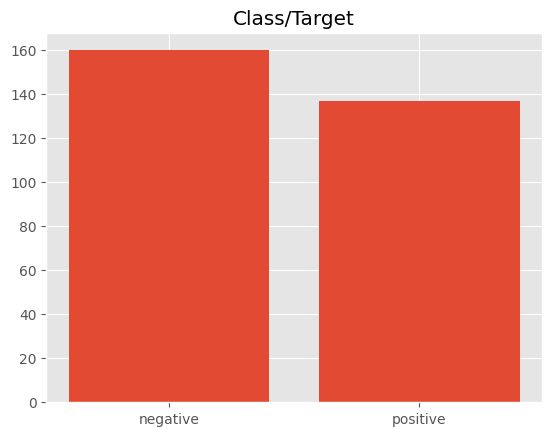

In [30]:
"""
The figure object is your empty canvas.

plt.style.use('ggplot'): the  "ggplot" style,  adjusts the style to emulate ggplot (a popular plotting package for R).

Barplot parameters: 
    x : a sequence of scalars (unique values of the class label)
    y the height of the bars (how many samples each class has)

set_xticks(): Set the x ticks with list of ticks
    Essentialy here we will pass the names of the bars. 

grid(): adds a grid to the plot
        b: Whether to show the grid lines. True/False

"""


#first create a series where you will store the class label
class_label = data_dropped["class"]
#replace the 0 with negative and 1 with positive, for the sake of interpretation
class_label = class_label.replace({0: 'negative', 1: 'positive'})
plt.style.use('ggplot') # just to make the plot more beautiful

fig = plt.figure() # an empty canvas
ax = fig.add_subplot() 

ax.bar(class_label.unique(), class_label.value_counts())  # ax.bar(x-axis, y-axis)
ax.set_title("Class/Target")
ax.set_xticks(class_label.unique())
ax.grid(b=True)

### Check for outliers with boxplots

Outliers can either be a mistake or just variance.

To check for outliers we can use the boxplot to see the distribution of the attributes. 
Any outliers are normally outside the plot region

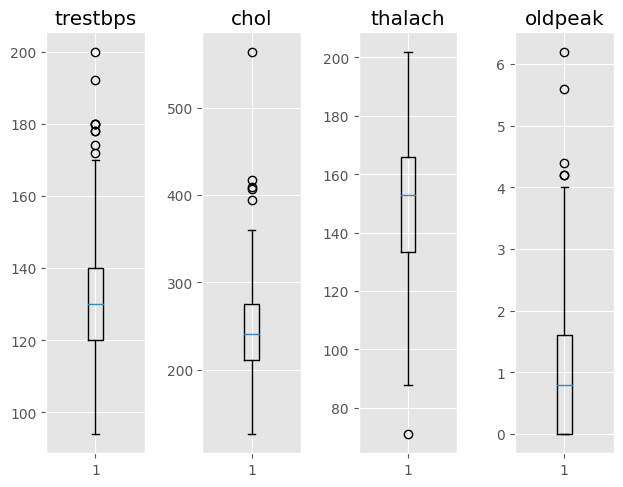

In [31]:
"""
Create boxplots for all the numerical features

Instead of plt.figure you can call plt.subplots and specify how many rows and columns you want.
if nrows=1, ncols=2 it will create 1 row with 2 plots/ if nrows=2, ncols=3 it will create 2 rows with 3 plots each.

Note!

The axes attribute is just a list of the matplotlib axes. So you can actually iterate through and create  different plots!


tight_layout(): automatically adjusts subplot params so that the subplot(s) fits in to the figure area


barplot:
    x: The input data.
"""

fig, ax = plt.subplots(1, 4) # the ax attriute is a list of plots, i think. a 1X4 plot matrix

plt.tight_layout()
ax[0].boxplot(data_dropped['trestbps'])
ax[0].set_title("trestbps")

ax[1].set_title('chol')
ax[1].boxplot(data["chol"])

ax[2].set_title('thalach')
ax[2].boxplot(data["thalach"])

ax[3].set_title('oldpeak')
ax[3].boxplot(data["oldpeak"])
plt.show()

### Grouped bar-plot
Count the values of males and females for each of the class labels and make a grouped box-plot

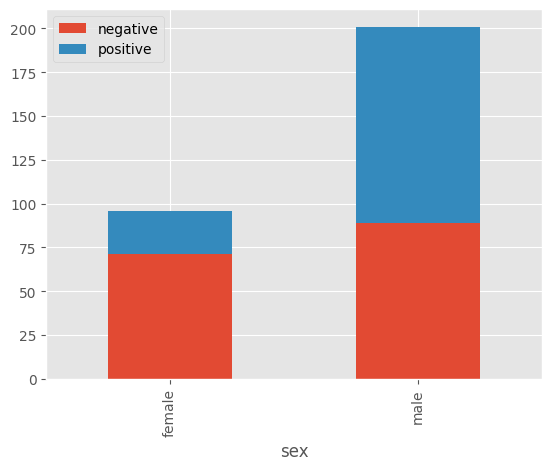

In [32]:
"""
Groupby: allows you to group together rows based on a column and perform an aggregate function on them. 
After groupby, specify a summarization function!

To plot: 
Call unstack, that pivots the grouped dataframe back, and just call plot with kind equals to bar!

stacked: The bars for the different class labels will be put one top of each other, instead of next to each other. 
Convert it to False if you want to see the difference
"""

ylabels = ['negative', 'positive']
labels = ("female", "male")

positions = (0, 1)

s_x = data_dropped.groupby("sex")['class'].value_counts() # group by the sex column. aggragate function with regards to the class variable
s_x.unstack().plot(kind='bar', stacked= True) #unstack the group table that we just created

plt.legend(labels=ylabels)
plt.xticks(positions, labels)
plt.show()


In [33]:
#check how groupby and unstack works
#for each female and male we have the counts of the class labels
s_x

sex  class
0.0  0         71
     1         25
1.0  1        112
     0         89
Name: class, dtype: int64

In [34]:
#if you call unstack the dataframe now is pivoted back!
s_x.unstack()

class,0,1
sex,,
0.0,71,25
1.0,89,112


### Grouped bar-plot
How many people are negative to heart disease and how many are posive, per age?

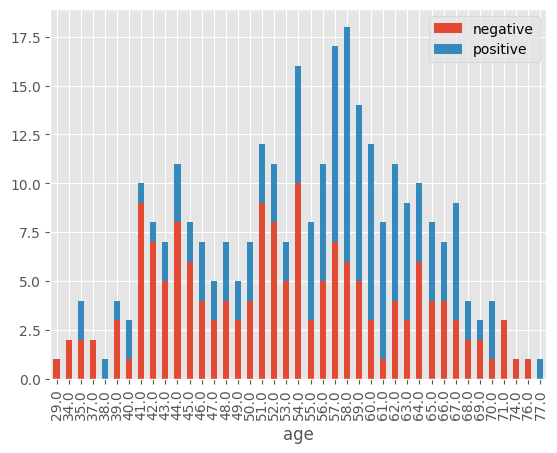

In [35]:
"""
Same procedure: 

"""

by_age= data_dropped.groupby(["age"])['class'].value_counts()
by_age.unstack().plot(kind='bar', stacked=True)
plt.legend(labels=ylabels)
plt.show()


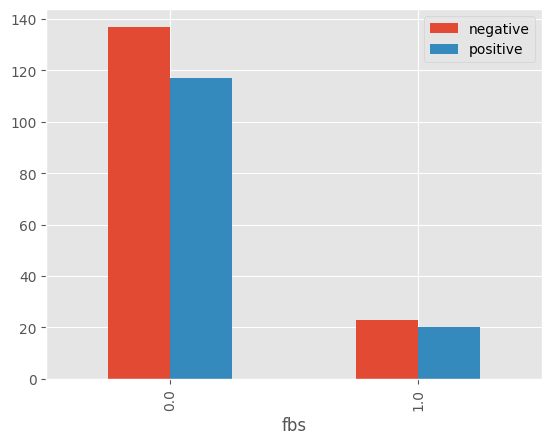

In [36]:
#similarly
fbs_by_class = data_dropped.groupby("fbs")['class'].value_counts()
fbs_by_class.unstack().plot(kind='bar', stacked= False)
plt.legend(labels=ylabels)
plt.show()

### Boxplot with seaborn 
Age in relation to class

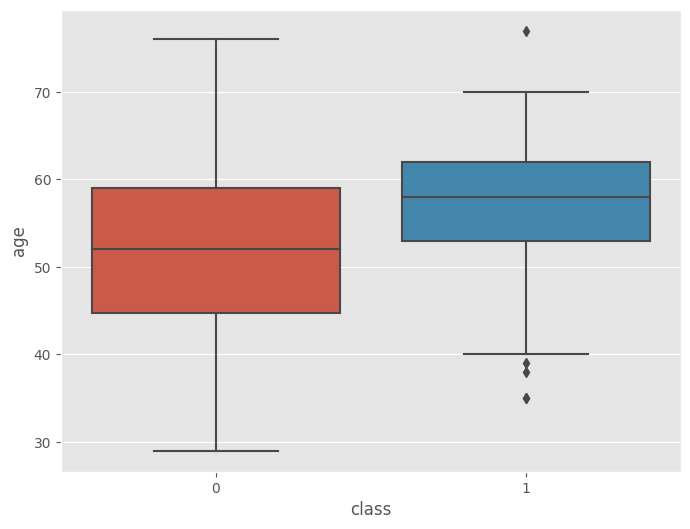

In [37]:
#boxplot of age in relation to the class

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="class", y="age", data=data_dropped)
plt.show()

### Highly correlated features and Heatmap

A strong correlation is indicated by a Pearson Correlation Coefficient value near 1. Therefore, when looking at the Heatmap, we want to see what correlates most with the class label.


— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)


— A value closer to 1 implies stronger positive correlation


— A value closer to -1 implies stronger negative correlation

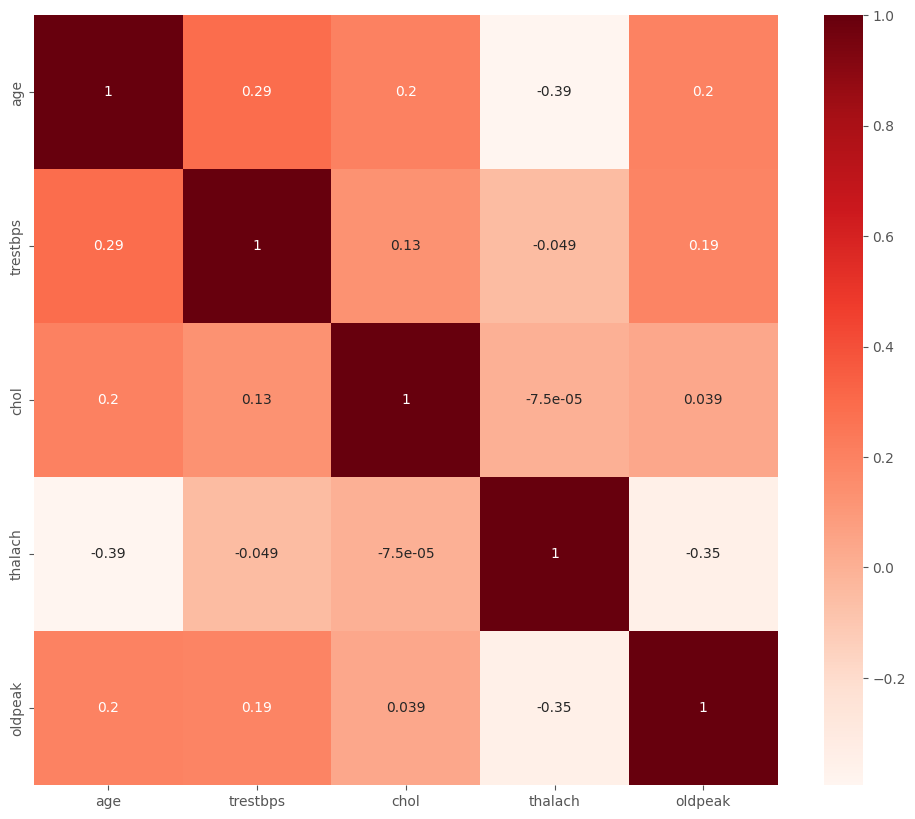

In [38]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))

#Computes pairwise correlation of columns, excluding NA/null value. returns 
cor = data_dropped[['age', 'trestbps', 'chol','thalach','oldpeak']].corr() # 1 = perfectly correlated, 0 = not correlated, -1 = perfectly invertedly correlated
cor

#Plots rectangular data as a color-encoded matrix. note that we are using seaborn. The parameter data needs to be rectangular dataset of pairwise correlations
sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds);

plt.show()

### Pairplot

Invetigate pairwise relationships

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


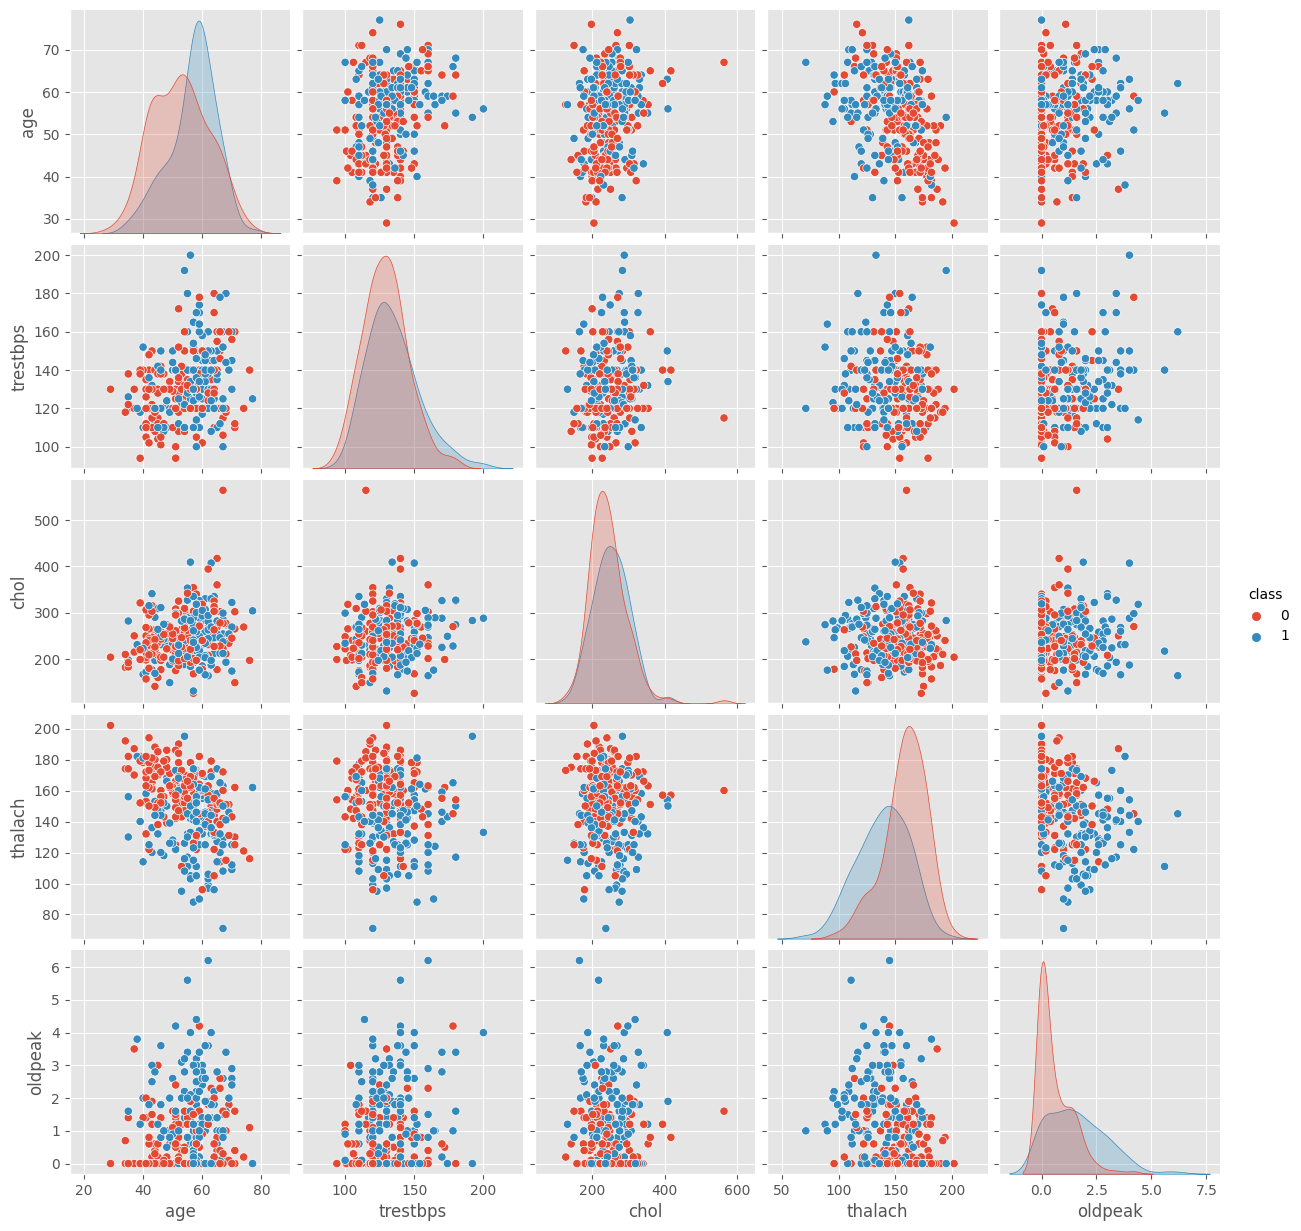

In [39]:
"""
Pairplot from seaborn:  investigates pairwise relationships.

Make a list of the numerical values, and in hue pass the class!


On the diagonal you see the distribution of these diffeent numerical variables

"""
sns.pairplot(data_dropped[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'class']], hue='class', size=2.5)

## Summary: Data Preprocessing steps

1. Check and handle  Missing Values 
2. Check for outliers 
4. Check for highly correlated features 
5. Standardize or Normalize numeric features 

# 4. Standardization 

We only standardize the numerical features. Class should not be standardized either!


Information about StandardScaler: [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Compare the effects of different scalers from sklearn: [link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [51]:
"""
Standardization is a crucial step before performing PCA, since we are interested in the components that maximize the variance. 

fit: computes the mean and std to be used for later scaling. 

transform: uses a previously computed mean and std to autoscale the data 

fit_transform:  does both at the same time. So you can do it with 1 line of code instead of 2.

"""

from sklearn.preprocessing import StandardScaler

numerical = ["age", "trestbps", "chol", "thalach", "oldpeak"] #list of num features

X = data_dropped[numerical] # sub-dataframe with only the numerical features


scaler = StandardScaler().fit(X) # fit computes the mean and standard deviation of X 

data_scaled = scaler.transform(X) # transform uses the mean and standard deviation to transform it to a standadized format

data_scaled


StandardScaler()


array([[ 0.93618065,  0.75038004, -0.27644339,  0.01749443,  1.06896529],
       [ 1.3789285 ,  1.59626645,  0.74455507, -1.81633388,  0.38177332],
       [ 1.3789285 , -0.65943064, -0.35349988, -0.89941972,  1.32666228],
       ...,
       [ 1.48961547,  0.69398761, -1.04700826, -0.37546878,  2.01385425],
       [ 0.27205887, -0.09550637, -2.24138382, -1.51069583,  0.12407633],
       [ 0.27205887, -0.09550637, -0.21865103,  1.06539633, -0.90671163]])

In [41]:
data_scaled = pd.DataFrame(data_scaled, columns=numerical)
data_scaled.head(5)

,age,trestbps,chol,thalach,oldpeak
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874


# 5. Principal Component Analysis (PCA)

Overall PCA  attemps to find out what features explain the most variance in your data

PCA also helps you visualize your data. 


In [42]:
#import PCA
from sklearn.decomposition import PCA

In [43]:
"""
Intatiate a pca object, specify how many principal components you want

Fit your dataset
Transform: and the apply the rotation and dimensionality reduction

"""

pca = PCA(n_components=2) # how many principal components we want
x_pca = pca.fit_transform(data_scaled)

In [44]:
#original shape
data_scaled.shape


(297, 5)

In [45]:
#shape after PCA
x_pca.shape

(297, 2)

### Visualize the principal components with colors on the class

Text(0, 0.5, '2nd PC')

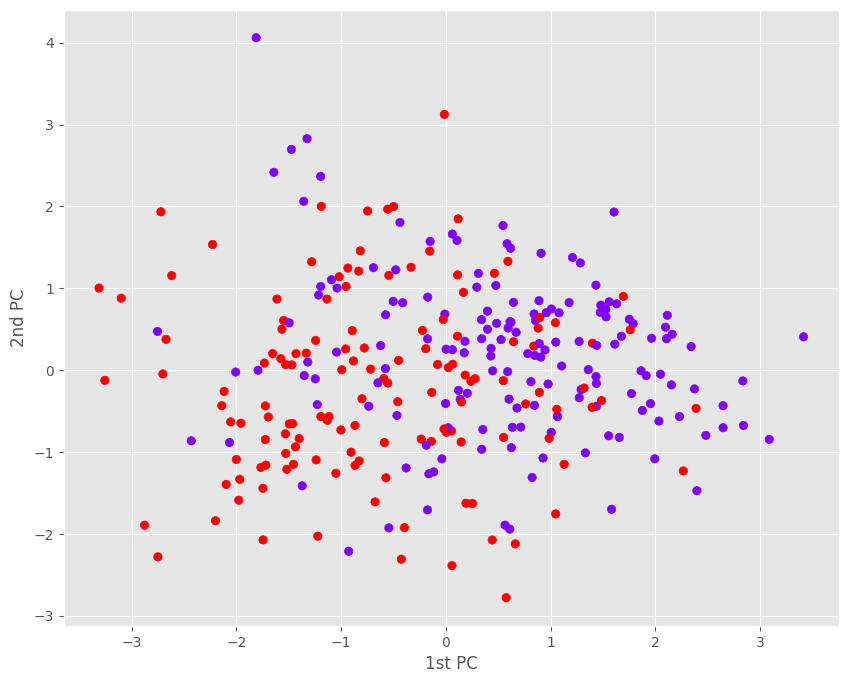

In [46]:
"""

Scatterplot to plot the two principal components. 

Note:
In general, interpreting the  components is not  easy. 
But based on the two components we can see if we have a clear seperation between the labels. 

For this dataset the seperation is not as clear. (in toy datasets you might be able to see clear groups forming)

"""

plt.figure(figsize=(10,8)) # just the size of the whole figure
plt.scatter(x=x_pca[:,0], y=x_pca[:,1], c=data_dropped['class'], cmap='rainbow') #c= you could choose for which target you would like to see the colors, colors of the dots, now different 'class' have different colors
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

As we can see here above it is centered around origo. We have the first and the second Principal Components as axis. We have transformed it to our new cordinate system

### Explained variance ratio 

In [47]:
# the explained variance for each component is stored in an attribure of the pca object called explained_variance_ratio_

pca.explained_variance_ratio_

# the first component explains 35% and the second 21%

# Components are a linear transformation that chooses a variable system for the dataset such that the greatest variance of the dataset comes to lie on the first axis. 
# and likewise the second greatest variance lies on the second axis.


array([0.35937581, 0.21941782])

### PCA components

In [48]:
pca.components_

# Each row represents a principal component and each column actually relates back to the original features


array([[-0.56678839, -0.38783028, -0.23076713,  0.50785684, -0.46601133],
       [ 0.12291279,  0.41914138,  0.69287222,  0.46934221, -0.32993777]])

In [49]:
df_comp = pd.DataFrame(pca.components_,  columns=numerical)


In [50]:
df_comp

,age,trestbps,chol,thalach,oldpeak
0,-0.566788,-0.387830,-0.230767,0.507857,-0.466011
1,0.122913,0.419141,0.692872,0.469342,-0.329938


### Heatmap for components

<AxesSubplot:>

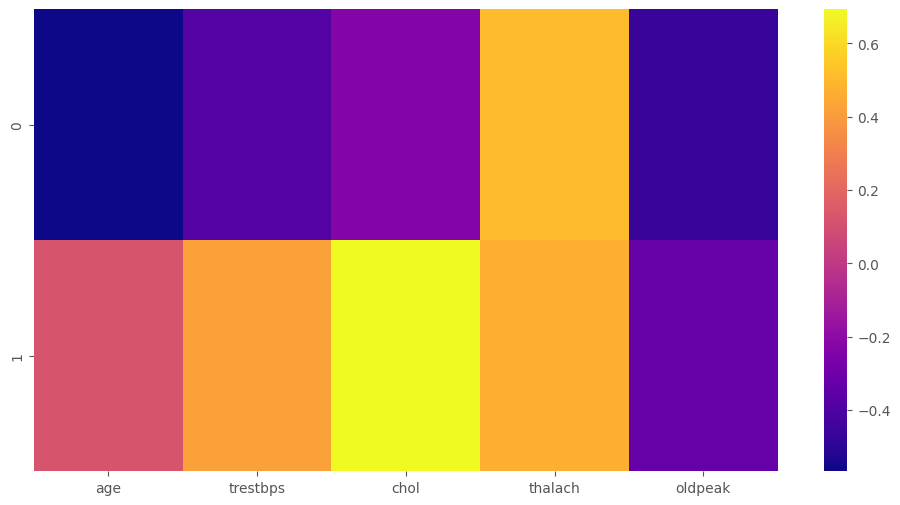

In [65]:
"""
If we create a heatmap now we will be able to see the correlation between various features and the principal components themselves

In that way you can see which features are more important for each principal component 
"""

plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

# every value in each of the PCA component descirbe the variance in the data of that value,
# its like a weight for that variable on the whole PCA component

In this section we have discussed the use of principal component analysis for dimensionality reduction and for visualization of high-dimensional data. 
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.
PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule

# END OF LAB 1